<a href="https://colab.research.google.com/github/profandersonvanin01/machine_learning/blob/main/2_Classifica%C3%A7%C3%A3o_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

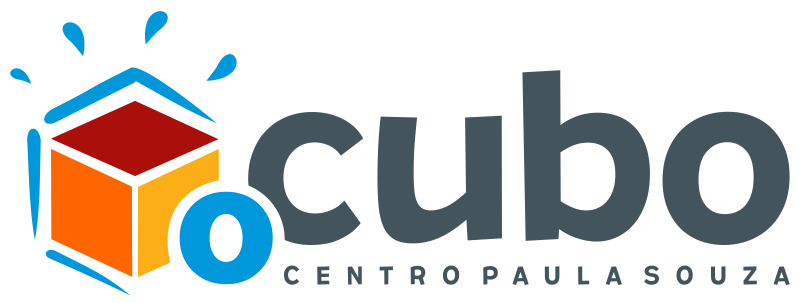

# Classificação

A Classificação é uma subárea do Machine Learning que atribui uma classe para uma nova observação a partir de diversas características/variáveis de observações passadas. Essa classificação pode ser binária (duas classes, 1 ou 0) ou multiclasse (três ou mais classes).

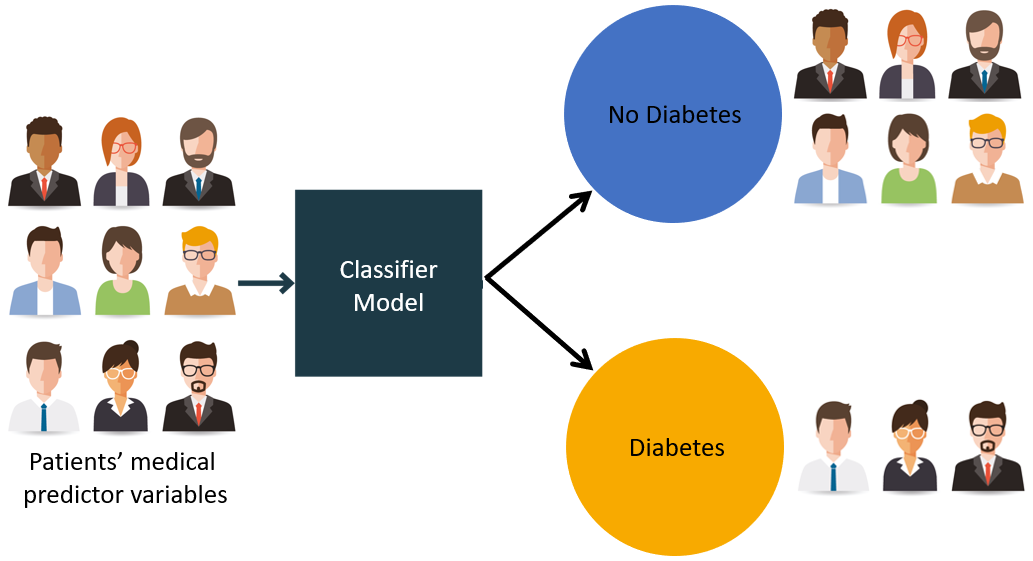

## Base de Dados IRIS

O conjunto de dados flor Iris ou conjunto de dados Iris de Fisher é um conjunto de dados multivariados introduzido pelo estatístico e biólogo britânico Ronald Fisher em seu artigo de 1936, O uso de múltiplas medições em problemas taxonômicos, como um exemplo de análise discriminante linear. Às vezes, é chamado de conjunto de dados da íris de Anderson porque Edgar Anderson coletou os dados para quantificar a variação morfológica das flores da íris de três espécies relacionadas. Duas das três espécies foram coletadas na Península de Gaspé, "todas do mesmo campo, colhidas no mesmo dia e medidas ao mesmo tempo pela mesma pessoa com a mesma aparelho".

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris ( Iris setosa, Iris virginica e Iris versicolor). Quatro variáveis foram medidas em cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros. Com base na combinação dessas quatro características, Fisher desenvolveu um modelo discriminante linear para distinguir as espécies umas das outras.

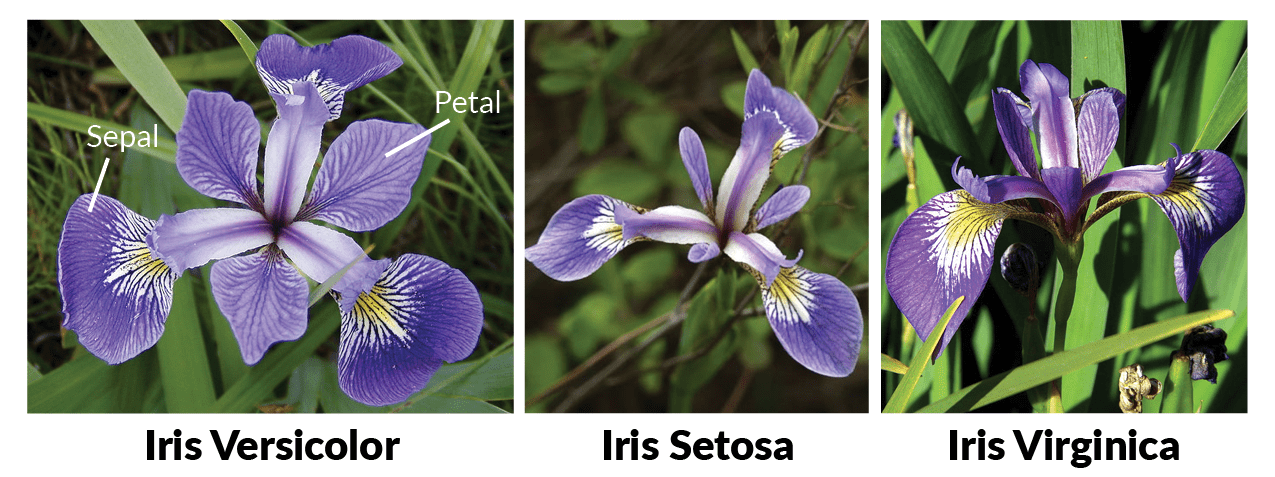

# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

# Carregar o dataset

In [ ]:
iris=pd.read_csv('https://raw.githubusercontent.com/profandersonvanin01/machine_learning/main/iris.csv')
iris.head()

In [ ]:
iris.shape

In [ ]:
iris.info()

In [ ]:
iris.describe()

In [ ]:
iris['variety'].value_counts()

# Dividindo o dataset

In [ ]:
X = iris.drop(['variety'], axis=1)
y = iris['variety']
print(f'X tamanho: {X.shape} | y tamanho: {y.shape} ')

# Dividindo em Treino e Teste 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Criação do Modelo de Machine Learning

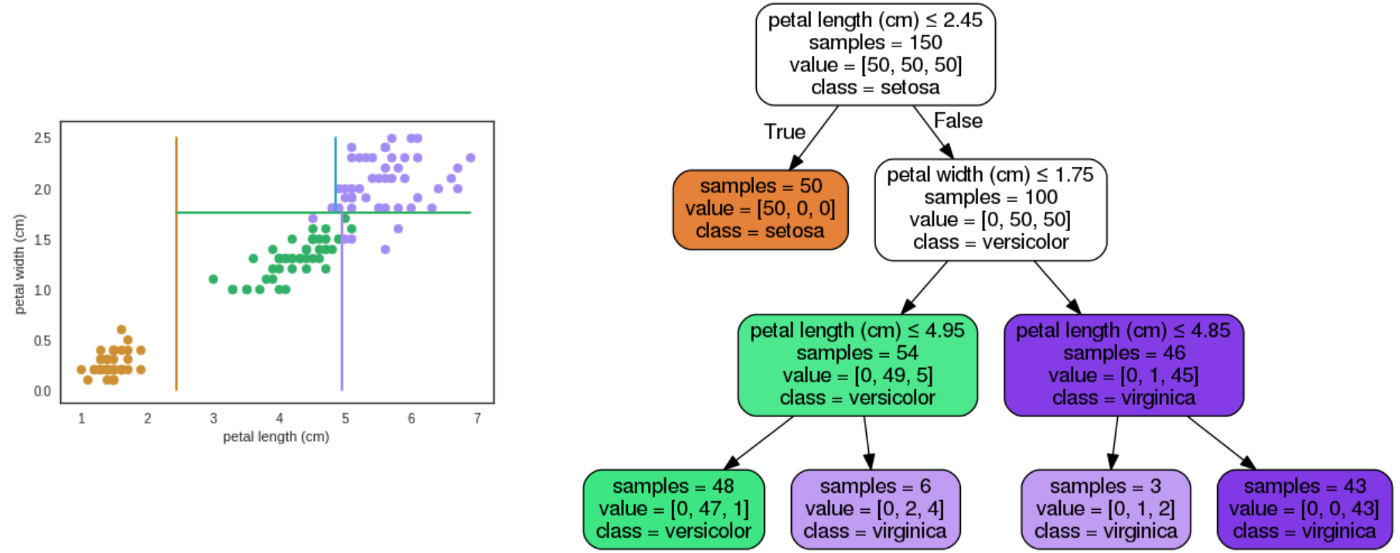

**Árvore de Decisão**

Uma árvore de decisão é um algoritmo de aprendizado de máquina supervisionado que é utilizado para classificação e para regressão. Isto é, pode ser usado para prever categorias discretas (sim ou não, por exemplo) e para prever valores numéricos (o valor do lucro em reais).

Assim como um fluxograma, a árvore de decisão estabelece nós (decision nodes) que se relacionam entre si por uma hierarquia. Existe o nó-raiz (root node), que é o mais importante, e os nós-folha (leaf nodes), que são os resultados finais. No contexto de machine learning, o raiz é um dos atributos da base de dados e o nó-folha é a classe ou o valor que será gerado como resposta.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
arvore = DecisionTreeClassifier(criterion='entropy'
                             , max_depth = 3
                             , random_state = 0)
arvore.fit(X_train,y_train)

# Previsões e cálculo de Acurácia (Métricas)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

In [ ]:
y_pred_arvore = arvore.predict(X_test) 
score_arvore = arvore.score(X_test, y_test) #ver o percentual de acerto
print(score_arvore)
confusion_matrix(y_test,y_pred_arvore)

#X_train, X_test, y_train, y_test

In [ ]:
report=classification_report(y_true=y_test,y_pred=y_pred_arvore)
print(report) #Mostra as métricas de resultado do modelo

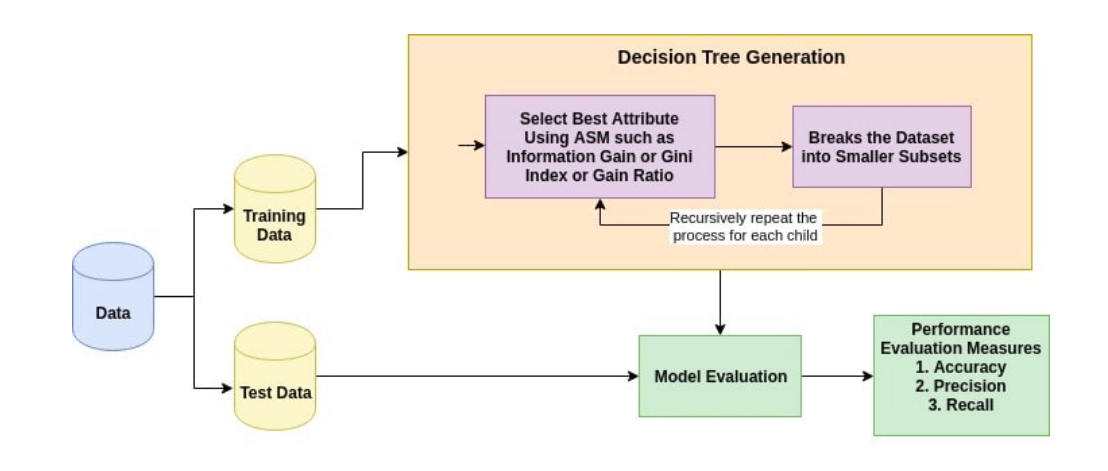

In [ ]:
import matplotlib as plt

In [ ]:
plot_confusion_matrix(arvore, X_test,y_test, cmap=plt.cm.Reds,normalize='true')

# Visualizando a Árvore de Decisão

In [ ]:
atributos = list(X.columns)
atributos

In [ ]:
classes = [str(s) for s in y.unique()]
classes

In [ ]:
import matplotlib as mpl
plt.rcParams['figure.dpi'] = 100

import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

plt.figure()
plot_tree(arvore,feature_names=atributos,class_names=classes, filled=True)
plt.show()

In [ ]:
iris.head(150)

## Enviando dados que o modelo nunca viu para executar as previsões

In [ ]:
dados_novos = [
	[4.8,3.0,1.2,0.7],
	[6.5,2.8,4.6,1.5]]

print(arvore.predict(dados_novos))

In [ ]:
resultados = arvore.predict(dados_novos)
resultados[0]

In [ ]:
print("Para os primeiros parâmetros o modelo previu que pertence a espécie: ",resultados[0])
print("Para os segundos parâmetros o modelo previu que pertence a espécie: ",resultados[1])

# **Exemplos de uso de um modelo de ML com Árvores de Decisão**

## **Diagnóstico de doenças**

Uma decision tree pode ser aplicada para identificar doenças a partir de informações cedidas ao algoritmo como treinamento — uma classificação. Nesse caso, o sistema apreende os dados, entende suas relações, realiza os cálculos a fim de entender quais são os nós mais importantes e ajusta as condições. 

A grande vantagem, como falamos, é o fato de que não é necessário se preocupar muito com o tratamento dos dados. Para resultados ainda mais interessantes, uma assembleia (random forest) deve ser adotada.

## **Previsão de empréstimo**

Outro tipo de uso é para previsão de um valor de empréstimo que pode ser concedido a um usuário do banco. Esse é um problema de regressão, pois requer uma informação numérica como saída. O sistema vai entender como a base de dados está organizada de acordo com os atributos e criar um modelo capaz de fazer essa previsão. 

## **Análise de sentimentos**

Não é incomum ver também aplicações na área da análise de sentimentos, subcategoria do campo de processamento de linguagem natural. O modelo entende os dados e tenta prever se um texto deve ser categorizado como positivo ou negativo, por exemplo. Para melhores resultados, a random forest é aplicada também.

## **Previsão de saída de funcionários**

Outro uso muito específico é para o RH saber quando um funcionário está quase saindo da empresa por insatisfação. Com a análise de dados sobre cada um, o modelo entende a base de dados e consegue realizar uma predição, ou seja, uma classificação. 